In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
from tqdm import tqdm

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

warnings.simplefilter('ignore')

In [2]:
music = pd.read_json('data/reviews_Digital_Music_5.json', lines=True)[['reviewText']].iloc[:1000]
video = pd.read_json('data/reviews_Amazon_Instant_Video_5.json', lines=True)[['reviewText']].iloc[:1000]

music['category'] = 'music'
video['category'] = 'video'

data = music.append(video)

In [3]:
X = data['reviewText']
y = data['category']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [33]:
results_logit = []
for i in tqdm(range(-4,4)):
    model = LogisticRegression(C=10**i)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    
    results_logit.append({
        'reg_param': 10**i,
        'accuracy_score': accuracy_score(y_test, predictions)
    })
results_logit = pd.DataFrame(results_logit)

results_svm = []
for i in tqdm(range(-4,4)):
    model = SVC(C=10**i)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    
    results_svm.append({
        'reg_param': 10**i,
        'accuracy_score': accuracy_score(y_test, predictions)
    })
results_svm = pd.DataFrame(results_svm)

100%|██████████| 8/8 [00:15<00:00,  1.31s/it]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

results_logit_count = []
for i in tqdm(range(-4,4)):
    model = LogisticRegression(C=10**i)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    
    results_logit_count.append({
        'reg_param': 10**i,
        'accuracy_score': accuracy_score(y_test, predictions)
    })
results_logit_count = pd.DataFrame(results_logit_count)

results_svm_count = []
for i in tqdm(range(-4,4)):
    model = SVC(C=10**i)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    
    results_svm_count.append({
        'reg_param': 10**i,
        'accuracy_score': accuracy_score(y_test, predictions)
    })
results_svm_count = pd.DataFrame(results_svm_count)

100%|██████████| 8/8 [00:15<00:00,  1.26s/it]


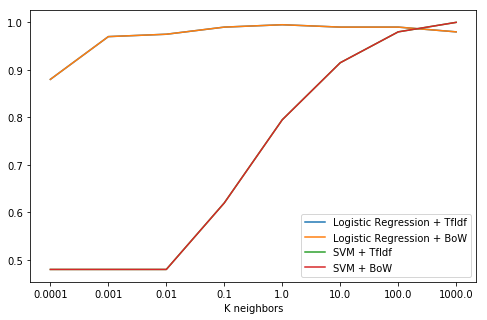

In [39]:
plt.plot(results_logit['accuracy_score'], label = 'Logistic Regression + TfIdf')
plt.plot(results_logit_count['accuracy_score'], label = 'Logistic Regression + BoW')
plt.plot(results_svm['accuracy_score'], label = 'SVM + TfIdf')
plt.plot(results_svm_count['accuracy_score'], label = 'SVM + BoW')
plt.xticks(range(len(results_logit['reg_param'])),results_logit['reg_param'])
plt.xlabel('K neighbors')
plt.legend()

In [53]:
music = pd.read_json('data/reviews_Digital_Music_5.json', lines=True)[['reviewText']].iloc[:30000]
video = pd.read_json('data/reviews_Amazon_Instant_Video_5.json', lines=True)[['reviewText']].iloc[:30000]

music['category'] = 'music'
video['category'] = 'video'

data = music.append(video)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

model = LogisticRegression(C=results_logit.iloc[results_logit['accuracy_score'].argmax()]['reg_param'])
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
def predict(text):
    text = vectorizer.transform([text])
    return model.predict(text)[0]

In [68]:
predict('She is incredible!')

'video'

In [69]:
predict('Nice album')

'music'

In [70]:
predict('I watched it on Netflix. Really Nice!')

'video'

In [71]:
predict('I listned this song on Spotify')

'music'